## Zadanie 5 ##

Napisz program symulujący działanie maszyny Turinga zadanej przez użytkownika (w pliku; zaproponuj
format pliku). Ogranicz się do alfabetów złożonych z dowolnego podzbioru abecadła (pomijając litery diakrytyzowane) i cyfr arabskich. Wyświetlaj konfigurację maszyny (stan, zawartość taśmy, położenie głowicy)
w kolejnym kroku (niekoniecznie graficznie). Umożliw podanie dowolnego wejścia (zgodnego z alfabetem). 

Zaproponowana przez mnie maszyna Turing rozpoznaje palindrom złożony z liter 'a', 'b'.

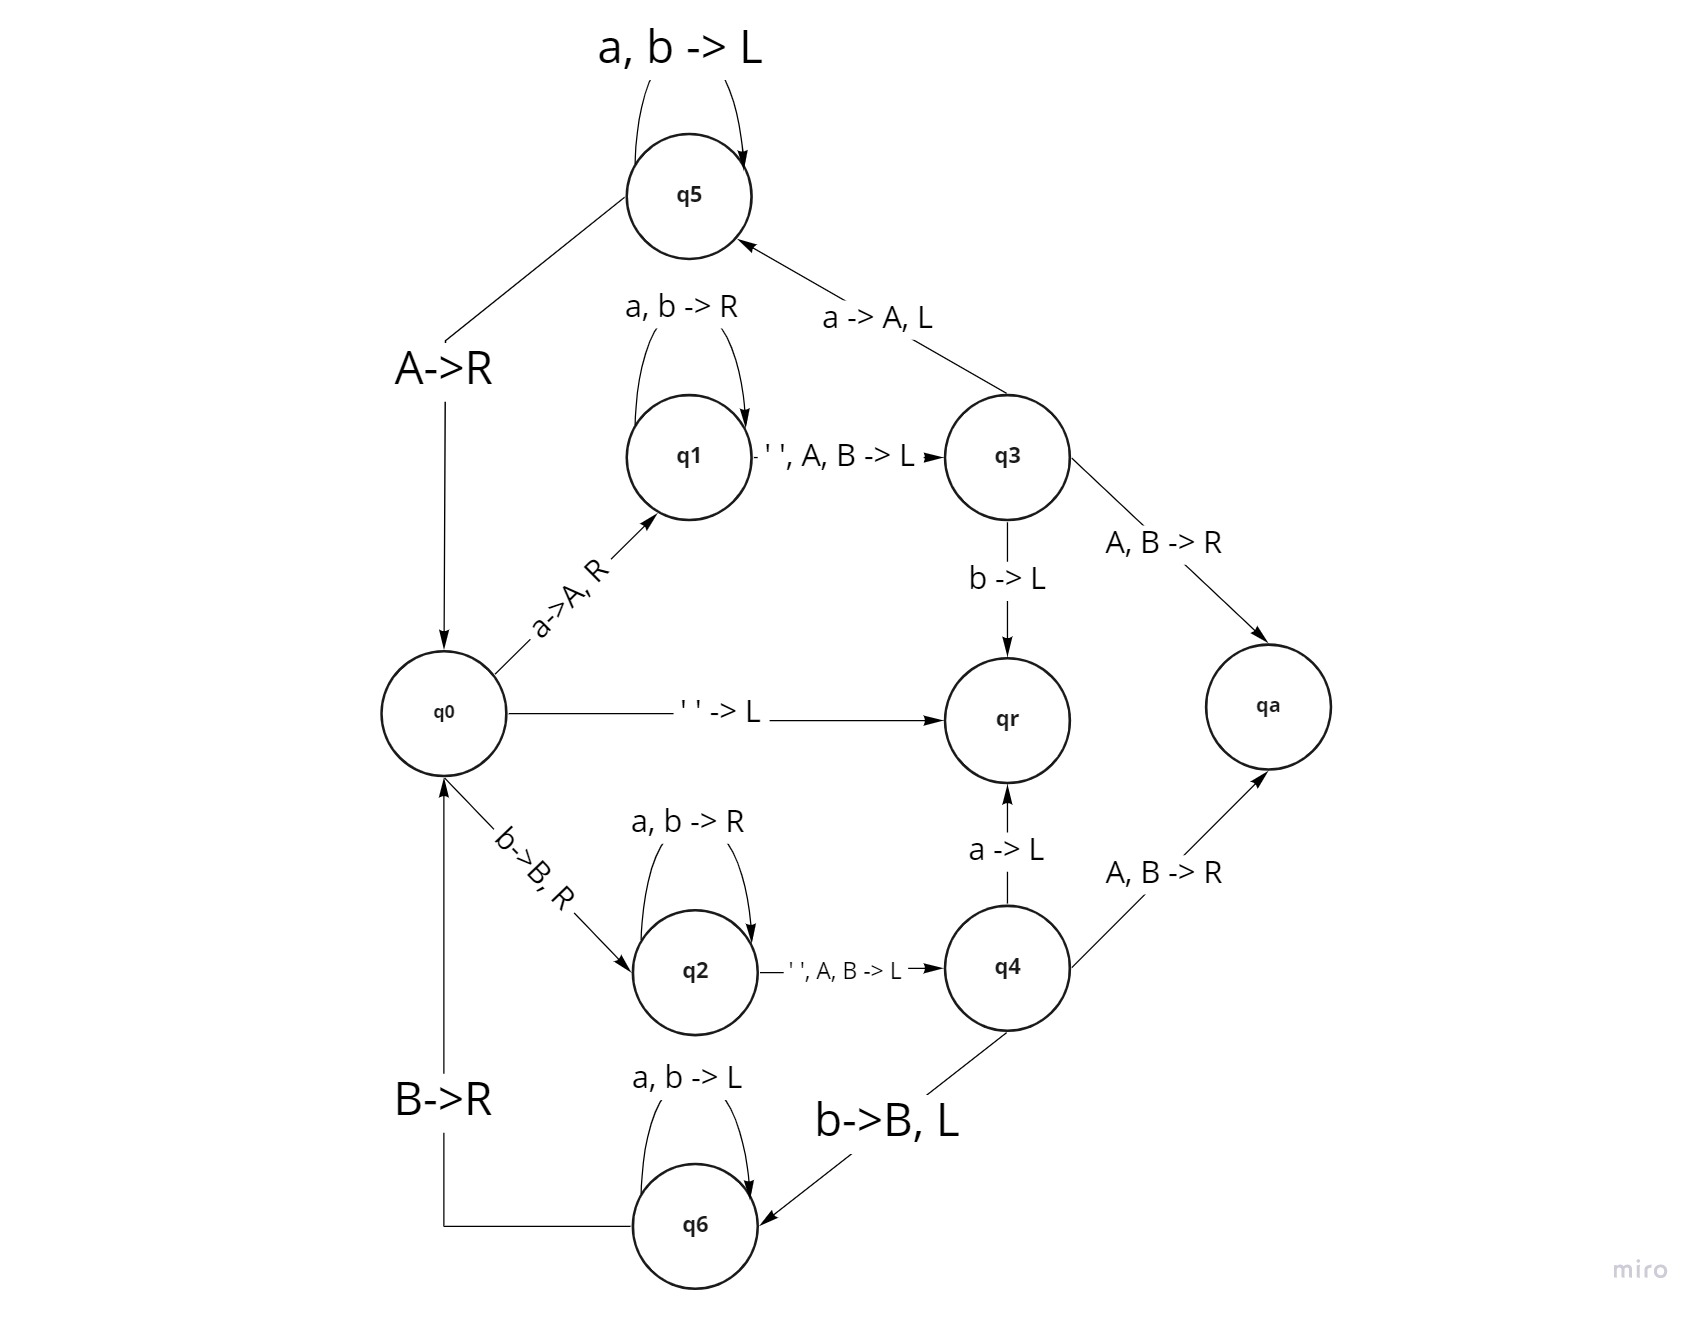

In [3]:
from IPython.display import Image
Image(filename='L2_z5_algodes.jpg', height=300)

In [ ]:
import json


class StateMachine:
    def __init__(self, rules, start_node):
        self.state = None
        self.head = None
        self.tape = None
        self.rules = rules
        self.start_node = start_node

    def go_left(self):
        if self.head > 0:
            self.head -= 1

    def go_right(self):
        if self.head == len(self.tape) - 1:
            self.tape.append(' ')
            self.head += 1
        else:
            self.head += 1

    def display(self):
        print(self.tape[:self.head] + [self.state] + self.tape[self.head:])

    def run_machine(self, input_string, display):
        print('Starting machine for: ', input_string)
        self.tape = list(input_string)
        self.head = 0
        self.state = self.start_node
        action = True

        while True:
            if display:
                self.display()
            action = self.rules[self.state][self.tape[self.head]]
            if action['change']:
                self.tape[self.head] = self.tape[self.head].upper()
            if action['head'] == 'R':
                self.go_right()
            else:
                self.go_left()

            self.state = action['next']
            if self.state == 'qa':
                if display:
                    print(self.state, ' - accepted')
                return 'ACCEPTED'
            elif self.state == 'qr':
                if display:
                    print(self.state, ' - rejected')
                return 'REJECTED'


# wczytanie zadanych parametrów maszyny z pliku json
with open('C:\PyCharm\AlghoritmsDesign\LAB2\machine_params\params_5.json', 'r') as f:
    dict_rules = json.load(f)


m = StateMachine(dict_rules, 'q0')

print(m.run_machine('aaa', display=False))
print(m.run_machine('ababa', display=False))
print(m.run_machine('bbb', display=False))
print(m.run_machine('baabb', display=False))
print(m.run_machine('bbb', display=False))
